In [89]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline   
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score
from sklearn.compose import ColumnTransformer   
import joblib   
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")           



In [65]:
df = pd.read_csv("D:/Python/Project/Nutrition/Dataset/synthetic_food_dataset_imbalanced.csv")

#Check the DataSet Count & Basic info & Structure 

In [66]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


# TO check the percentage of Missing Values

In [67]:
print("Shape:", df.shape)
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.concat([missing, missing_pct], axis=1)
missing_df.columns = ['missing_count', 'missing_pct']
print(missing_df[missing_df['missing_count']>0])

Shape: (31700, 16)
                missing_count  missing_pct
Calories                  375         1.18
Protein                   375         1.18
Fat                       375         1.18
Carbs                     375         1.18
Sugar                     375         1.18
Fiber                     375         1.18
Sodium                    375         1.18
Cholesterol               375         1.18
Glycemic_Index            375         1.18
Water_Content             375         1.18
Serving_Size              375         1.18


In [68]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size']
Categorical columns: ['Meal_Type', 'Preparation_Method', 'Food_Name']


In [69]:
for col in cat_cols:
    print(f"Column: {col}")

Column: Meal_Type
Column: Preparation_Method
Column: Food_Name


In [70]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] =df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [71]:
df.isnull().sum()

Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64

In [72]:
df.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [73]:
df = df.dropna()
print("New Shape after dropping missing values:", df.shape)



New Shape after dropping missing values: (31700, 16)


In [75]:
%pip install seaborn
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.


<Axes: >

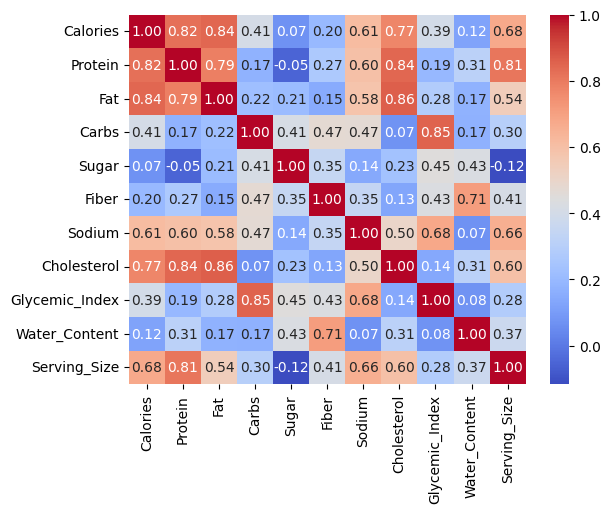

In [76]:
sns.heatmap(df[num_cols].corr(),annot=True,fmt=".2f",cmap="coolwarm")

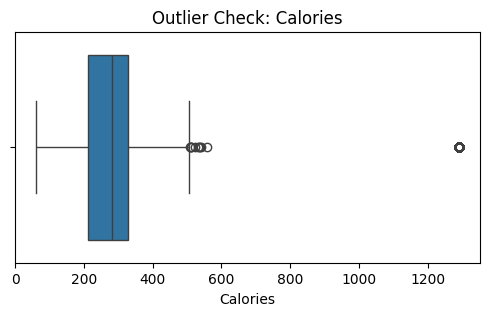

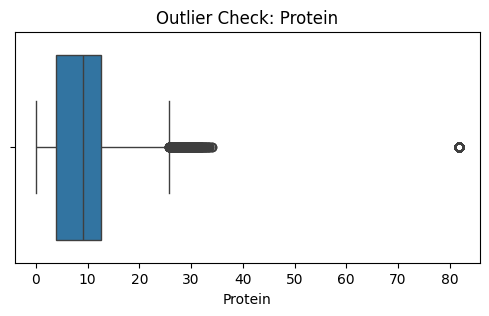

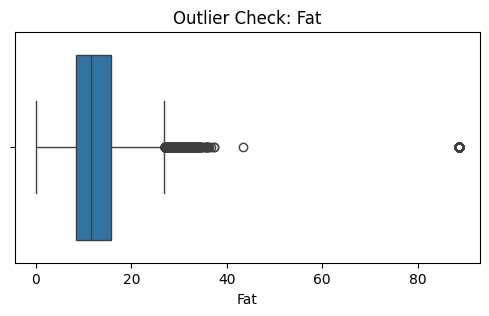

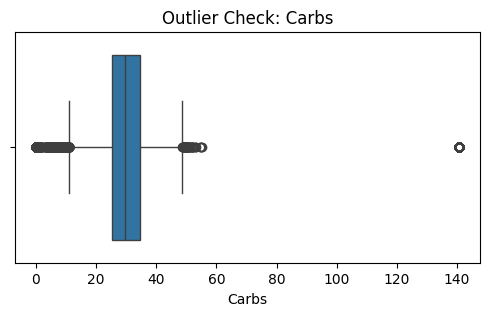

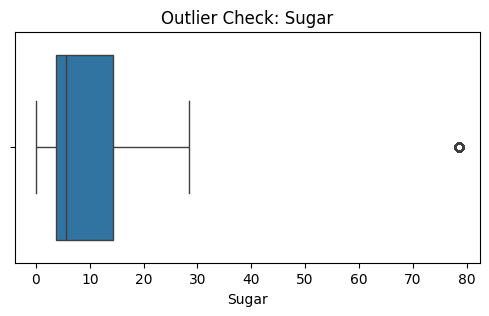

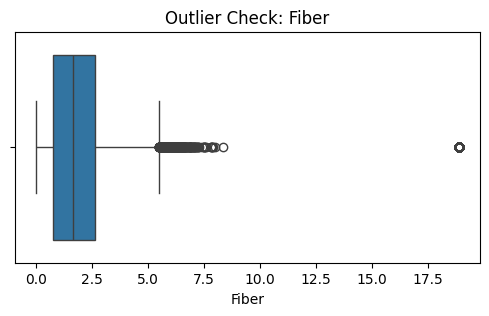

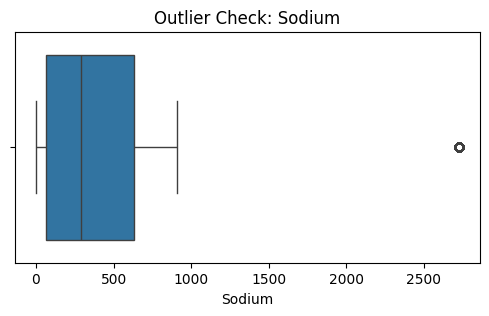

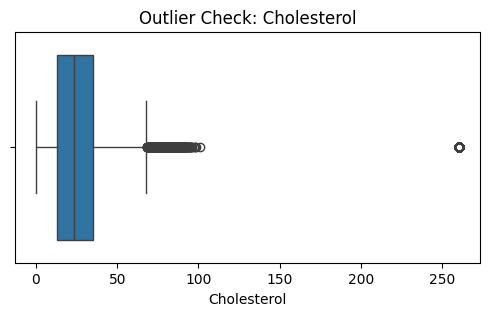

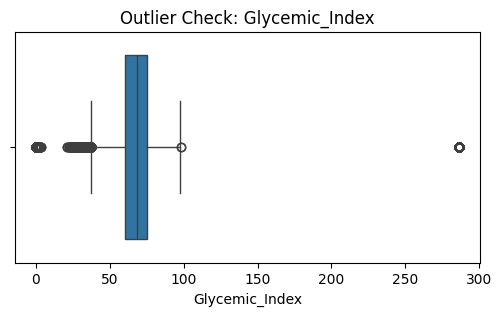

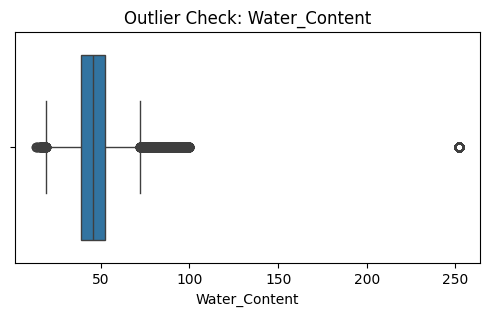

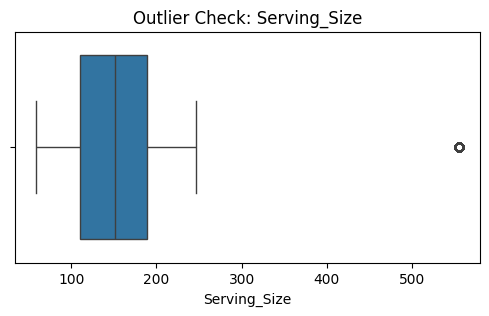

In [77]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()


In [78]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers =  df[df[col] < lower_bound][col].tolist() + df[df[col] > upper_bound][col].tolist()
    print(f"Outliers in {col}: {outliers}") 
    df[col] = df[col].clip(lower_bound, upper_bound)

Outliers in Calories: [1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 1289.9567634777725, 511.6274062488328, 1289.9567634777725, 1289.9567634777725

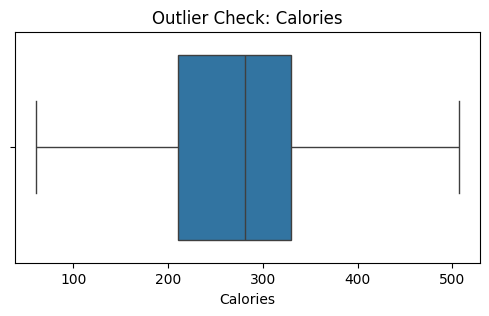

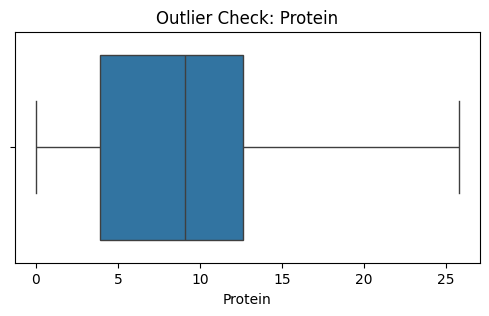

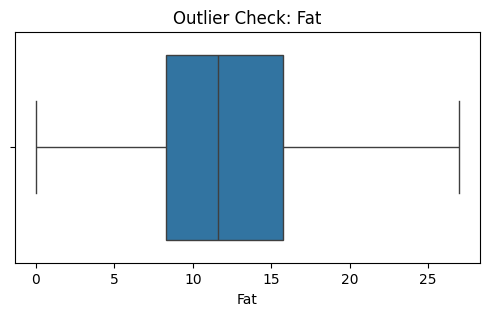

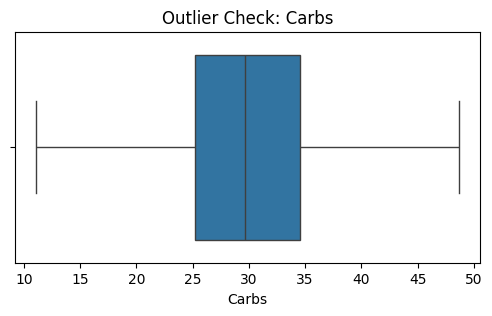

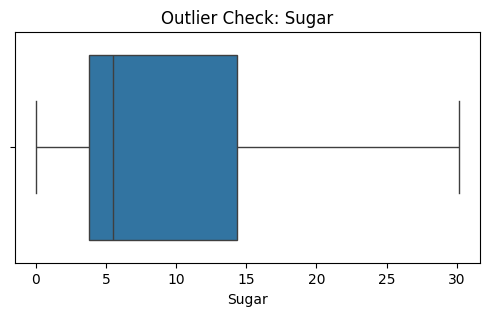

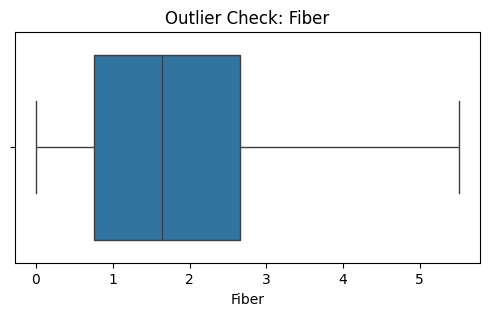

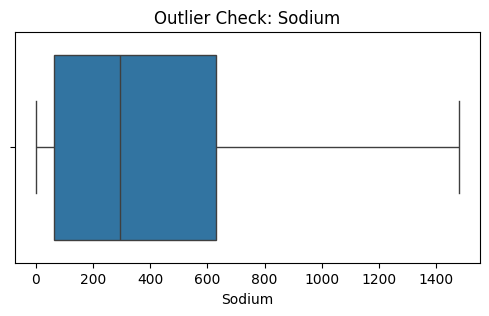

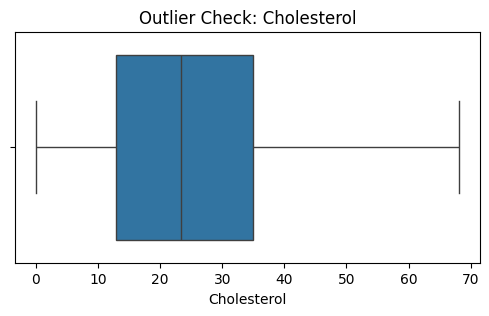

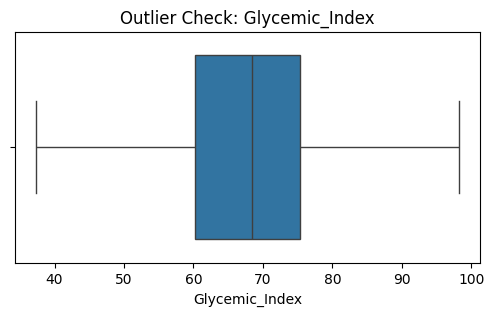

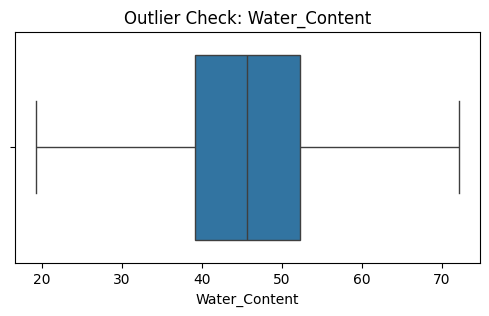

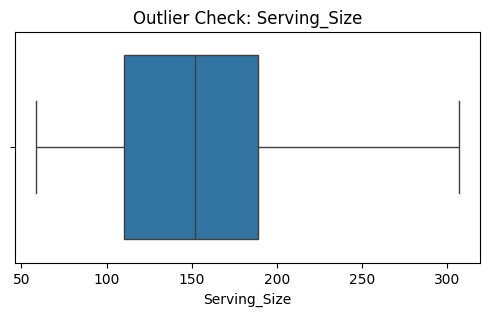

In [79]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()

In [80]:
df.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [119]:

df.columns = df.columns.str.strip()
X = df.drop('Food_Name', axis=1)
y = df['Food_Name']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [114]:
X.shape, y.shape

((31700, 15), (31700,))

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

pipeline = Pipeline(steps=[
    
    ('model', model)
])




In [ ]:
 
df.columns = df.columns.str.strip()
X = df.drop('Food_Name', axis=1)
y = df['Food_Name']
 
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='drop'
)

model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model),
])

# split and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
missing = [c for c in (num_cols + cat_cols) if c not in X_train.columns]
print("Missing transformer columns in X_train:", missing)

pipeline.fit(X_train, y_train)
 

Numerical columns: ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size']
Categorical columns: ['Meal_Type', 'Preparation_Method']
Missing transformer columns in X_train: []


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


              precision    recall  f1-score   support

       Apple       0.93      0.98      0.96       300
      Banana       0.94      0.98      0.96       240
      Burger       0.99      0.97      0.98      1000
       Donut       0.99      0.98      0.99       900
   Ice Cream       0.98      0.99      0.98       600
       Pasta       0.99      0.99      0.99       800
       Pizza       0.98      0.98      0.98      1200
       Salad       0.98      0.98      0.98       200
       Steak       0.99      0.99      0.99       400
       Sushi       0.98      0.99      0.98       700

    accuracy                           0.98      6340
   macro avg       0.98      0.98      0.98      6340
weighted avg       0.98      0.98      0.98      6340



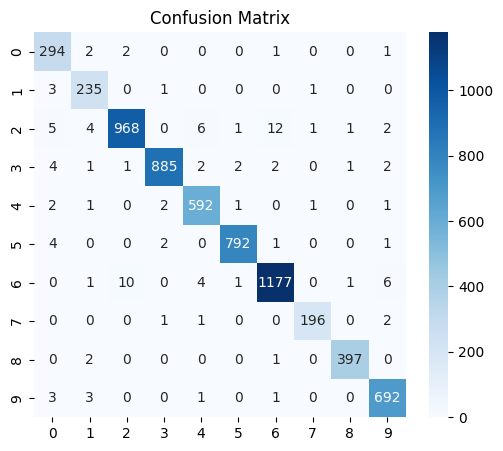

In [125]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Numerical columns: ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size']
Categorical columns: ['Meal_Type', 'Preparation_Method']

Training LogisticRegression ...
LogisticRegression Accuracy: 0.9831
              precision    recall  f1-score   support

       Apple       0.97      0.97      0.97       300
      Banana       0.99      0.95      0.97       240
      Burger       0.98      0.98      0.98      1000
       Donut       1.00      0.98      0.99       900
   Ice Cream       0.99      0.98      0.99       600
       Pasta       1.00      0.99      0.99       800
       Pizza       0.98      0.98      0.98      1200
       Salad       1.00      0.98      0.99       200
       Steak       1.00      0.99      0.99       400
       Sushi       0.94      0.99      0.97       700

    accuracy                           0.98      6340
   macro avg       0.99      0.98      0.98      6340
weighted avg     

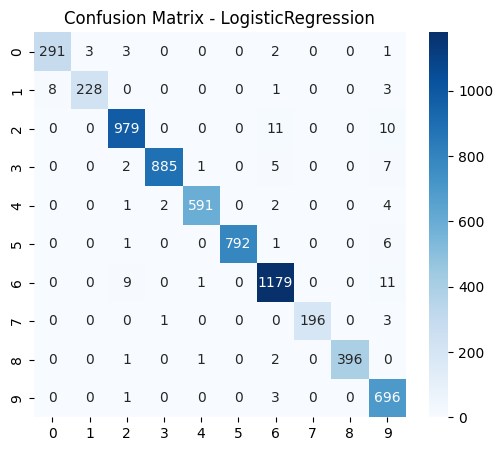


Training RandomForest ...
RandomForest Accuracy: 0.9823
              precision    recall  f1-score   support

       Apple       0.93      0.98      0.96       300
      Banana       0.94      0.98      0.96       240
      Burger       0.99      0.97      0.98      1000
       Donut       0.99      0.98      0.99       900
   Ice Cream       0.98      0.99      0.98       600
       Pasta       0.99      0.99      0.99       800
       Pizza       0.98      0.98      0.98      1200
       Salad       0.98      0.98      0.98       200
       Steak       0.99      0.99      0.99       400
       Sushi       0.98      0.99      0.98       700

    accuracy                           0.98      6340
   macro avg       0.98      0.98      0.98      6340
weighted avg       0.98      0.98      0.98      6340



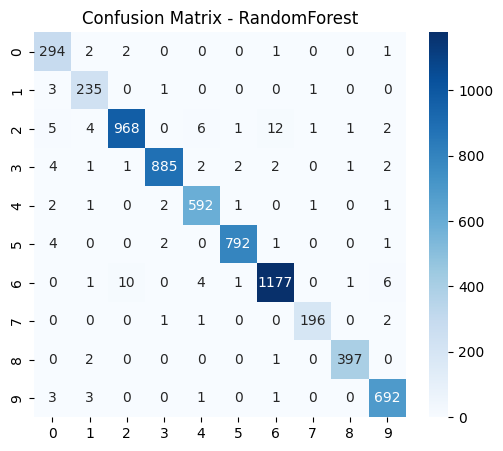


Training GradientBoosting ...
GradientBoosting Accuracy: 0.9852
              precision    recall  f1-score   support

       Apple       0.99      0.98      0.98       300
      Banana       1.00      0.97      0.99       240
      Burger       0.99      0.98      0.98      1000
       Donut       0.99      0.98      0.99       900
   Ice Cream       0.99      0.98      0.99       600
       Pasta       0.99      0.99      0.99       800
       Pizza       0.95      0.99      0.97      1200
       Salad       1.00      0.98      0.99       200
       Steak       1.00      0.99      0.99       400
       Sushi       0.99      0.99      0.99       700

    accuracy                           0.99      6340
   macro avg       0.99      0.98      0.99      6340
weighted avg       0.99      0.99      0.99      6340



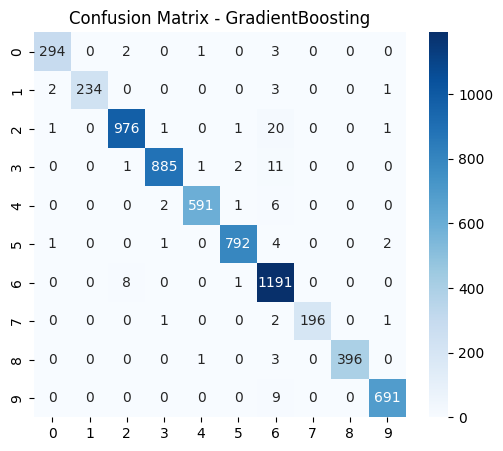


Training ExtraTrees ...
ExtraTrees Accuracy: 0.9855
              precision    recall  f1-score   support

       Apple       0.99      0.98      0.98       300
      Banana       1.00      0.98      0.99       240
      Burger       0.98      0.98      0.98      1000
       Donut       0.99      0.98      0.99       900
   Ice Cream       0.98      0.99      0.99       600
       Pasta       1.00      0.99      0.99       800
       Pizza       0.96      0.99      0.98      1200
       Salad       1.00      0.98      0.99       200
       Steak       1.00      0.99      0.99       400
       Sushi       1.00      0.99      0.99       700

    accuracy                           0.99      6340
   macro avg       0.99      0.98      0.99      6340
weighted avg       0.99      0.99      0.99      6340



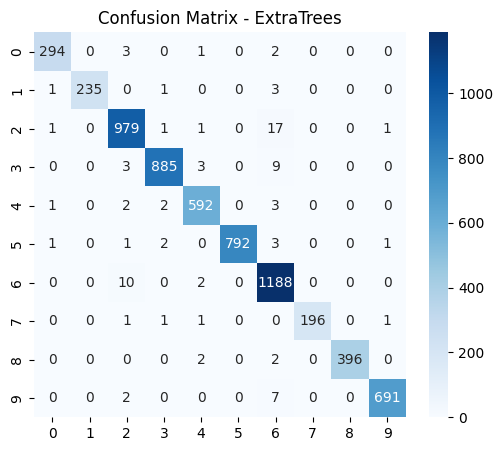


Training SVC ...
SVC Accuracy: 0.9860
              precision    recall  f1-score   support

       Apple       1.00      0.98      0.99       300
      Banana       1.00      0.98      0.99       240
      Burger       0.99      0.98      0.98      1000
       Donut       1.00      0.98      0.99       900
   Ice Cream       1.00      0.98      0.99       600
       Pasta       1.00      0.99      0.99       800
       Pizza       0.94      0.99      0.97      1200
       Salad       1.00      0.98      0.99       200
       Steak       1.00      0.99      0.99       400
       Sushi       1.00      0.99      0.99       700

    accuracy                           0.99      6340
   macro avg       0.99      0.98      0.99      6340
weighted avg       0.99      0.99      0.99      6340



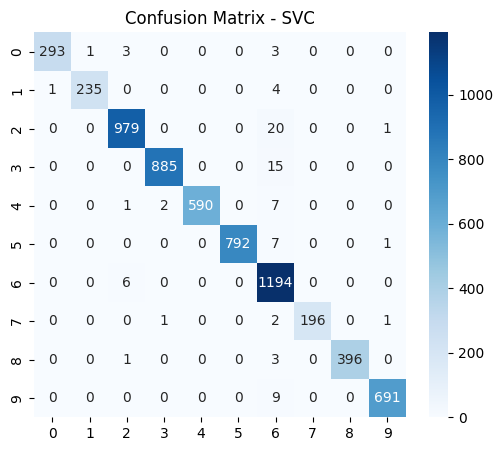


Training KNeighbors ...
KNeighbors Accuracy: 0.9798
              precision    recall  f1-score   support

       Apple       0.96      0.97      0.97       300
      Banana       0.93      0.97      0.95       240
      Burger       0.98      0.95      0.97      1000
       Donut       0.99      0.98      0.99       900
   Ice Cream       0.99      0.99      0.99       600
       Pasta       0.99      0.99      0.99       800
       Pizza       0.95      0.99      0.97      1200
       Salad       1.00      0.98      0.99       200
       Steak       1.00      0.99      0.99       400
       Sushi       1.00      0.98      0.99       700

    accuracy                           0.98      6340
   macro avg       0.98      0.98      0.98      6340
weighted avg       0.98      0.98      0.98      6340



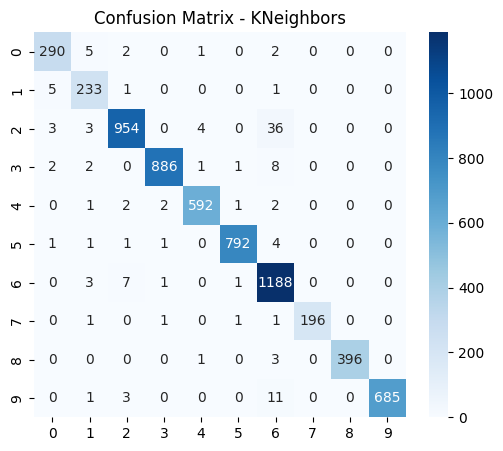


Training GaussianNB ...
GaussianNB Accuracy: 0.9841
              precision    recall  f1-score   support

       Apple       0.99      0.97      0.98       300
      Banana       0.99      0.97      0.98       240
      Burger       0.98      0.98      0.98      1000
       Donut       1.00      0.98      0.99       900
   Ice Cream       1.00      0.98      0.99       600
       Pasta       1.00      0.99      0.99       800
       Pizza       0.99      0.98      0.99      1200
       Salad       1.00      0.98      0.99       200
       Steak       1.00      0.99      0.99       400
       Sushi       0.92      1.00      0.96       700

    accuracy                           0.98      6340
   macro avg       0.99      0.98      0.98      6340
weighted avg       0.98      0.98      0.98      6340



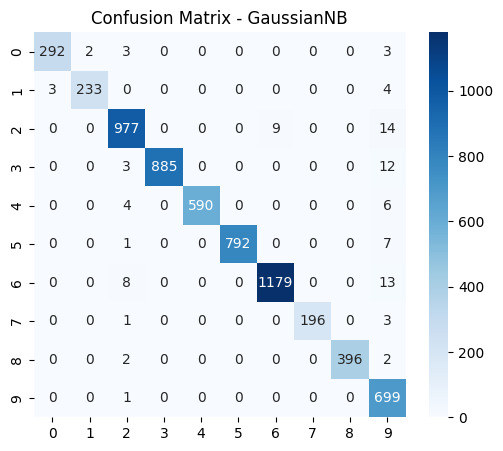


Summary:
                model  accuracy
4                 SVC  0.985962
3          ExtraTrees  0.985489
2    GradientBoosting  0.985174
6          GaussianNB  0.984069
0  LogisticRegression  0.983123
1        RandomForest  0.982334
5          KNeighbors  0.979811


In [ ]:
# ...existing code...
# prepare features/target and preprocessor
df.columns = df.columns.str.strip()
X = df.drop('Food_Name', axis=1)
y = df['Food_Name']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# OneHotEncoder compat for different sklearn versions
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', ohe, cat_cols)
    ],
    remainder='drop'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "GaussianNB": GaussianNB()
}

results = []
for name, clf in models.items():
    pipe = Pipeline([('preprocessor', preprocessor), ('model', clf)])
    print(f"\nTraining {name} ...")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    results.append((name, acc))

# summary
import pandas as pd
summary = pd.DataFrame(results, columns=['model', 'accuracy']).sort_values('accuracy', ascending=False)
print("\nSummary:")
print(summary)
